# 项目一

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import optimizers
import time

In [1]:
import numpy as np
import pandas as pd

In [2]:
def creat_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(look_back,len(dataset)):
        a = dataset[(i-look_back): i]
        dataX.append(a)
        dataY.append(dataset[i])
    return np.array(dataX), np.array(dataY)

In [3]:
dataframe = pd.read_csv(r'C:\Users\asus\Downloads\zgpa_train.csv',
                        header=0, parse_dates=[0],
                        index_col=0, usecols=[0, 5], squeeze=True)
dataset = dataframe.values
dataframe.head(10)

date
2016-01-04    70997200
2016-01-05    87498504
2016-01-06    48012112
2016-01-07    23647604
2016-01-08    98239664
2016-01-11    99355696
2016-01-12    74380912
2016-01-13    62533020
2016-01-14    79722712
2016-01-15    59140260
Name: volume, dtype: int64

In [18]:
dataset.shape

(731, 1)

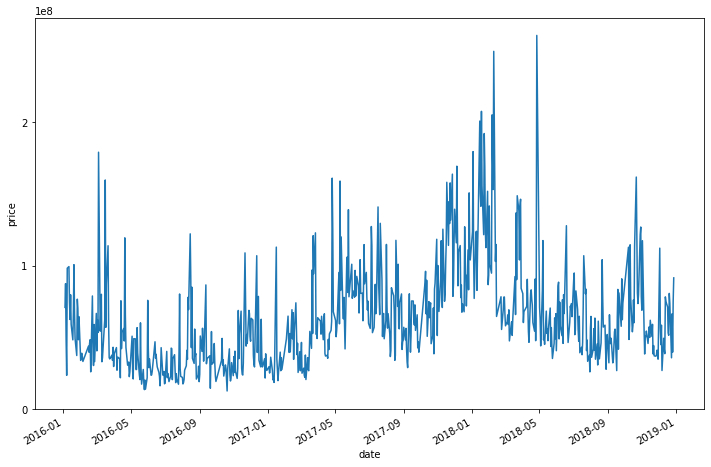

In [6]:
plt.figure(figsize=(12, 8))
dataframe.plot()
plt.ylabel('price')
plt.yticks(np.arange(0, 300000000, 100000000))
plt.show()

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))

In [5]:
train_size = int(len(dataset)*0.8)
test_size = len(dataset)-train_size
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]

In [6]:
look_back = 1
trainX, trainY = creat_dataset(train, look_back)
testX, testY = creat_dataset(test, look_back)

In [19]:
print(trainX.shape,trainY.shape)
print(testX.shape,testY.shape)

(583, 1, 1) (583, 1)
(146, 1, 1) (146, 1)


In [22]:
model = Sequential()

model.add(LSTM(input_dim=1, units=50, return_sequences=True))
#model.add(Dropout(0.2))

model.add(LSTM(input_dim=50, units=100, return_sequences=True))
#model.add(Dropout(0.2))

model.add(LSTM(input_dim=100, units=200, return_sequences=True))
#model.add(Dropout(0.2))

model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(100))
model.add(Dense(1))

model.add(Activation('relu'))
start = time.time()
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, None, 50)          10400     
                                                                 
 lstm_5 (LSTM)               (None, None, 100)         60400     
                                                                 
 lstm_6 (LSTM)               (None, None, 200)         240800    
                                                                 
 lstm_7 (LSTM)               (None, 300)               601200    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                

In [24]:
history = model.fit(trainX, trainY, batch_size=64, epochs=50, 
                    validation_split=0.1, verbose=2)
print('compilatiom time:', time.time()-start)

Epoch 1/50
9/9 - 16s - loss: 0.0397 - val_loss: 0.0212 - 16s/epoch - 2s/step
Epoch 2/50
9/9 - 0s - loss: 0.0257 - val_loss: 0.0238 - 182ms/epoch - 20ms/step
Epoch 3/50
9/9 - 0s - loss: 0.0230 - val_loss: 0.0242 - 170ms/epoch - 19ms/step
Epoch 4/50
9/9 - 0s - loss: 0.0228 - val_loss: 0.0239 - 164ms/epoch - 18ms/step
Epoch 5/50
9/9 - 0s - loss: 0.0222 - val_loss: 0.0225 - 189ms/epoch - 21ms/step
Epoch 6/50
9/9 - 0s - loss: 0.0197 - val_loss: 0.0204 - 185ms/epoch - 21ms/step
Epoch 7/50
9/9 - 0s - loss: 0.0147 - val_loss: 0.0257 - 169ms/epoch - 19ms/step
Epoch 8/50
9/9 - 0s - loss: 0.0132 - val_loss: 0.0212 - 176ms/epoch - 20ms/step
Epoch 9/50
9/9 - 0s - loss: 0.0130 - val_loss: 0.0214 - 167ms/epoch - 19ms/step
Epoch 10/50
9/9 - 0s - loss: 0.0129 - val_loss: 0.0231 - 172ms/epoch - 19ms/step
Epoch 11/50
9/9 - 0s - loss: 0.0128 - val_loss: 0.0220 - 172ms/epoch - 19ms/step
Epoch 12/50
9/9 - 0s - loss: 0.0133 - val_loss: 0.0215 - 182ms/epoch - 20ms/step
Epoch 13/50
9/9 - 0s - loss: 0.0134 - va

In [25]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [26]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [27]:
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(testScore))


Train Sccore 28470175.16 RMSE
Train Sccore 22733605.12 RMSE


In [32]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot = np.reshape(trainPredictPlot, (dataset.shape[0], 1))
trainPredictPlot[look_back: len(trainPredict)+look_back, :] = trainPredict

In [33]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot = np.reshape(testPredictPlot, (dataset.shape[0], 1))
testPredictPlot[len(trainPredict)+(look_back*2)+1: len(dataset)-1, :] = testPredict


ValueError: could not broadcast input array from shape (146,1) into shape (144,1)

# 项目二

##  下载股票数据集

In [2]:
#先引入后面分析、可视化等可能用到的库
import tushare as ts
import pandas as pd  
# import matplotlib.pyplot as plt
# #正常显示画图时出现的中文和负号
# # from pylab import mpl
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False

#设置token
token='c06fa5bcc56b7bba6d0df7965cce5b1b7803adc1452c32566073452d'
#ts.set_token(token)
pro = ts.pro_api(token)

In [5]:
fa=pro.daily(ts_code='000005.SZ', start_date='20200101',
               end_date='20221230')
fa.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20221230,13.04,13.28,12.96,13.16,13.03,0.13,0.9977,818035.98,1074756.754
1,000001.SZ,20221229,13.07,13.13,12.85,13.03,13.14,-0.11,-0.8371,666890.09,865144.967
2,000001.SZ,20221228,13.16,13.38,13.00,13.14,13.11,0.03,0.2288,791191.98,1042402.080
3,000001.SZ,20221227,12.87,13.22,12.87,13.11,12.77,0.34,2.6625,886004.12,1160090.119
4,000001.SZ,20221226,12.99,13.04,12.71,12.77,12.98,-0.21,-1.6179,797119.87,1021903.963


In [15]:
fa.to_csv(r'C:\Users\asus\Desktop\000005.csv')

## 处理缺失值，选取数据

In [15]:
dataframe = pd.read_csv(r'C:\Users\asus\Desktop\000002.csv',
                        parse_dates=[2],index_col=2)

dataframe.head(10)

,Unnamed: 0,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2022-12-30,0,000002.SZ,18.23,18.32,17.93,18.20,18.16,0.04,0.2203,514863.83,935144.077
2022-12-29,1,000002.SZ,18.49,18.52,17.96,18.16,18.58,-0.42,-2.2605,606868.83,1099884.563
2022-12-28,2,000002.SZ,18.48,18.79,18.30,18.58,18.51,0.07,0.3782,397502.52,736417.992
2022-12-27,3,000002.SZ,18.44,18.91,18.40,18.51,18.37,0.14,0.7621,459403.71,855405.355
2022-12-26,4,000002.SZ,18.74,18.75,18.20,18.37,18.78,-0.41,-2.1832,578845.07,1063343.596
2022-12-23,5,000002.SZ,18.59,18.96,18.48,18.78,18.73,0.05,0.2670,331003.40,619945.293
2022-12-22,6,000002.SZ,18.93,19.06,18.61,18.73,18.70,0.03,0.1604,412155.56,776149.748
2022-12-21,7,000002.SZ,18.83,18.96,18.59,18.70,18.71,-0.01,-0.0534,471299.66,883042.188
2022-12-20,8,000002.SZ,18.80,19.16,18.45,18.71,19.35,-0.64,-3.3075,673299.49,1267532.132


In [18]:
dataframe.index

DatetimeIndex(['2022-12-30', '2022-12-29', '2022-12-28', '2022-12-27',
               '2022-12-26', '2022-12-23', '2022-12-22', '2022-12-21',
               '2022-12-20', '2022-12-19',
               ...
               '2020-01-15', '2020-01-14', '2020-01-13', '2020-01-10',
               '2020-01-09', '2020-01-08', '2020-01-07', '2020-01-06',
               '2020-01-03', '2020-01-02'],
              dtype='datetime64[ns]', name='trade_date', length=727, freq=None)

In [16]:
data=dataframe['2022']#选择2022年的数据

C:\Users\asus\AppData\Local\Temp/ipykernel_8900/425421986.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data=dataframe['2022']#选择2022年的数据


In [17]:
dates = pd.date_range('2022-01-01','2022-12-30').strftime("%Y-%m-%d").to_list()
dates=pd.to_datetime(dates)
df = pd.DataFrame(dates,columns=['trade_date']) # 将列表数据转化为 一列
df.head()

,trade_date
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05


In [18]:
#合并数据
# 基于共同列trade_date的外连接(并集)
df1 = pd.merge(df,data,how='outer',on='trade_date')
df1.head(20)

,trade_date,Unnamed: 0,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-04,241.0,000002.SZ,19.49,20.65,19.36,20.49,19.76,0.73,3.6943,1947202.02,3956475.666
4,2022-01-05,240.0,000002.SZ,20.43,21.61,20.36,21.17,20.49,0.68,3.3187,1930457.91,4075047.844
5,2022-01-06,239.0,000002.SZ,21.12,21.66,20.79,21.05,21.17,-0.12,-0.5668,1380274.06,2923511.291
6,2022-01-07,238.0,000002.SZ,21.38,22.46,21.35,21.89,21.05,0.84,3.9905,2262768.05,4969780.143
7,2022-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-01-10,237.0,000002.SZ,21.80,22.66,21.56,22.16,21.89,0.27,1.2334,1527796.63,3376585.470


In [19]:
df1=df1.fillna(method='ffill')#用前一个非缺失值填补
df1=df1.fillna(method='backfill')#用后一个非缺失值填补
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 363
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   trade_date  364 non-null    datetime64[ns]
 1   Unnamed: 0  364 non-null    float64       
 2   ts_code     364 non-null    object        
 3   open        364 non-null    float64       
 4   high        364 non-null    float64       
 5   low         364 non-null    float64       
 6   close       364 non-null    float64       
 7   pre_close   364 non-null    float64       
 8   change      364 non-null    float64       
 9   pct_chg     364 non-null    float64       
 10  vol         364 non-null    float64       
 11  amount      364 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 37.0+ KB


In [20]:
df1.to_csv(r'C:\Users\asus\Desktop\更改后的2.csv')

## 数据分析

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# # For reading stock data from yahoo
# from pandas_datareader.data import DataReader


# For time stamps
from datetime import datetime

In [2]:
dataframe1 = pd.read_csv(r'C:\Users\asus\Desktop\股票数据集\原始数据\000001.csv',
                        parse_dates=[2],index_col=2)
dataframe2 = pd.read_csv(r'C:\Users\asus\Desktop\股票数据集\原始数据\000002.csv',
                        parse_dates=[2],index_col=2)
dataframe3 = pd.read_csv(r'C:\Users\asus\Desktop\股票数据集\原始数据\000004.csv',
                        parse_dates=[2],index_col=2)
dataframe4 = pd.read_csv(r'C:\Users\asus\Desktop\股票数据集\原始数据\000005.csv',
                        parse_dates=[2],index_col=2)
data1=dataframe1.sort_index(ascending=True)
data2=dataframe2.sort_index(ascending=True)
data3=dataframe3.sort_index(ascending=True)
data4=dataframe4.sort_index(ascending=True)
# data1=dataframe1.sort_values(by='trade_date')  # 按date这一列进行排序
# data2=dataframe2.sort_values(by='trade_date')  # 按date这一列进行排序
# data3=dataframe3.sort_values(by='trade_date')  # 按date这一列进行排序
# data4=dataframe4.sort_values(by='trade_date')  # 按date这一列进行排序

In [3]:
data1.head()

,Unnamed: 0,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2020-01-02,727,000001.SZ,16.65,16.95,16.55,16.87,16.45,0.42,2.5532,1530231.87,2571196.482
2020-01-03,726,000001.SZ,16.94,17.31,16.92,17.18,16.87,0.31,1.8376,1116194.81,1914495.474
2020-01-06,725,000001.SZ,17.01,17.34,16.91,17.07,17.18,-0.11,-0.6403,862083.50,1477930.193
2020-01-07,724,000001.SZ,17.13,17.28,16.95,17.15,17.07,0.08,0.4687,728607.56,1247047.135
2020-01-08,723,000001.SZ,17.00,17.05,16.63,16.66,17.15,-0.49,-2.8571,847824.12,1423608.811


In [14]:
dataframe['week_name'] = dataframe['trade_date'].dt.day_name()  #获取星期几，返回Monday，Tuesday...
#显示星期对应的数值dates.dt.weekday
dataframe.head()

,Unnamed: 0,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,week_name
0,0,000002.SZ,2022-12-30,18.23,18.32,17.93,18.20,18.16,0.04,0.2203,514863.83,935144.077,Friday
1,1,000002.SZ,2022-12-29,18.49,18.52,17.96,18.16,18.58,-0.42,-2.2605,606868.83,1099884.563,Thursday
2,2,000002.SZ,2022-12-28,18.48,18.79,18.30,18.58,18.51,0.07,0.3782,397502.52,736417.992,Wednesday
3,3,000002.SZ,2022-12-27,18.44,18.91,18.40,18.51,18.37,0.14,0.7621,459403.71,855405.355,Tuesday
4,4,000002.SZ,2022-12-26,18.74,18.75,18.20,18.37,18.78,-0.41,-2.1832,578845.07,1063343.596,Monday


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


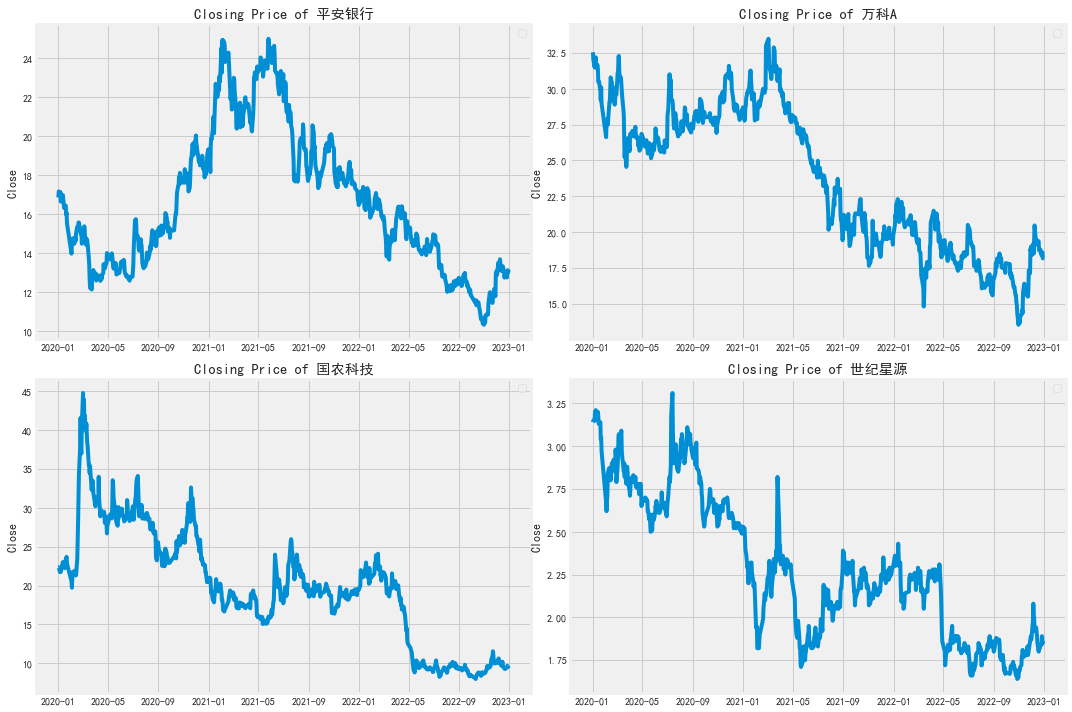

In [18]:
company_list=[data1,data2,data3,data4]
tech_list=['平安银行','万科A','国农科技','世纪星源']

# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1)
#     company['close'].plot()
    plt.plot(company['trade_date'], company['close'])
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i]}")  
plt.tight_layout()#自动调整子图参数，使之填充整个图像区域

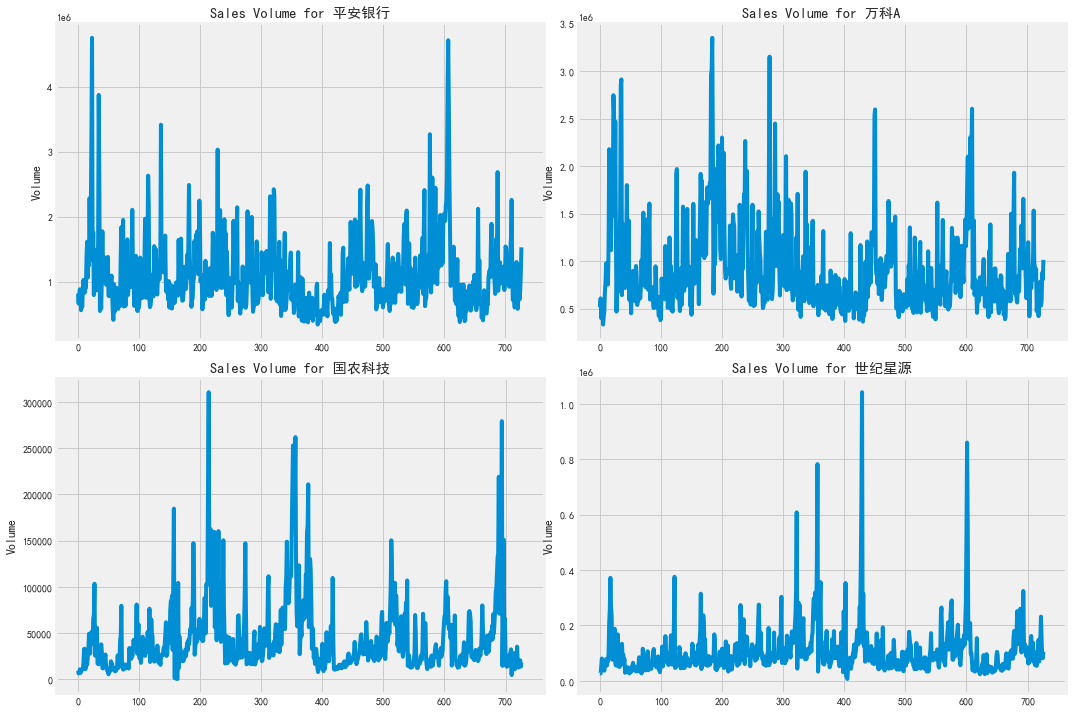

In [10]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1)
    company['vol'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i]}")
    
plt.tight_layout()

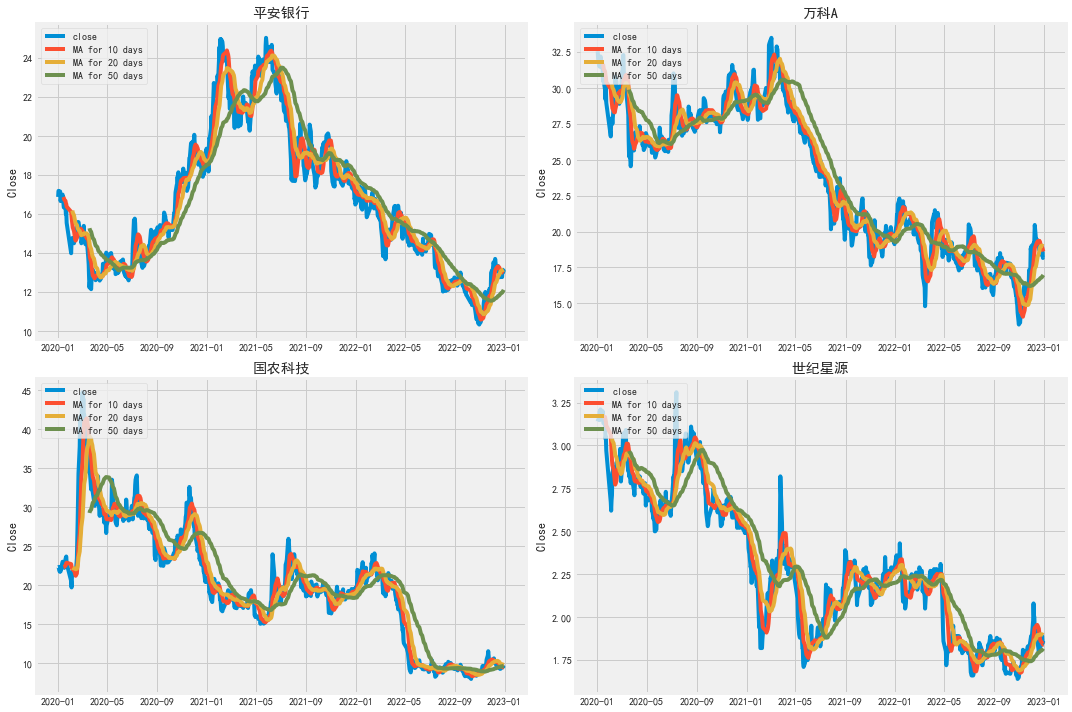

In [20]:
ma_day = [10, 20, 50]  #10天、20天、50天的移动平均
#data1['close'].iloc[0:20].mean()
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()
        
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1)
#     company['close'].plot()
    plt.plot(company['trade_date'], company['close'],
             company['trade_date'], company['MA for 10 days'],
             company['trade_date'], company['MA for 20 days'],
             company['trade_date'],company['MA for 50 days'])#多个y绘图，plt.plot(x,y1,x,y2) # 此时x不可省略
    plt.legend(["close", "MA for 10 days", "MA for 20 days", "MA for 50 days"],loc='upper left')
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(tech_list[i])
    
plt.tight_layout()#自动调整子图参数，使之填充整个图像区域


In [9]:
# 简单移动平均的编程实现
def move_average(data,step=10):
    singemoving = []
    for i in range(step-1,len(data)):
        sum=0
        for j in range(0,step):
            sum=sum+data[i - j]
        singemoving.append(sum/step)
    return singemoving.reverse()

In [3]:
company_list=[data1,data2,data3,data4]
tech_list=['平安银行','万科A','国农科技','世纪星源']

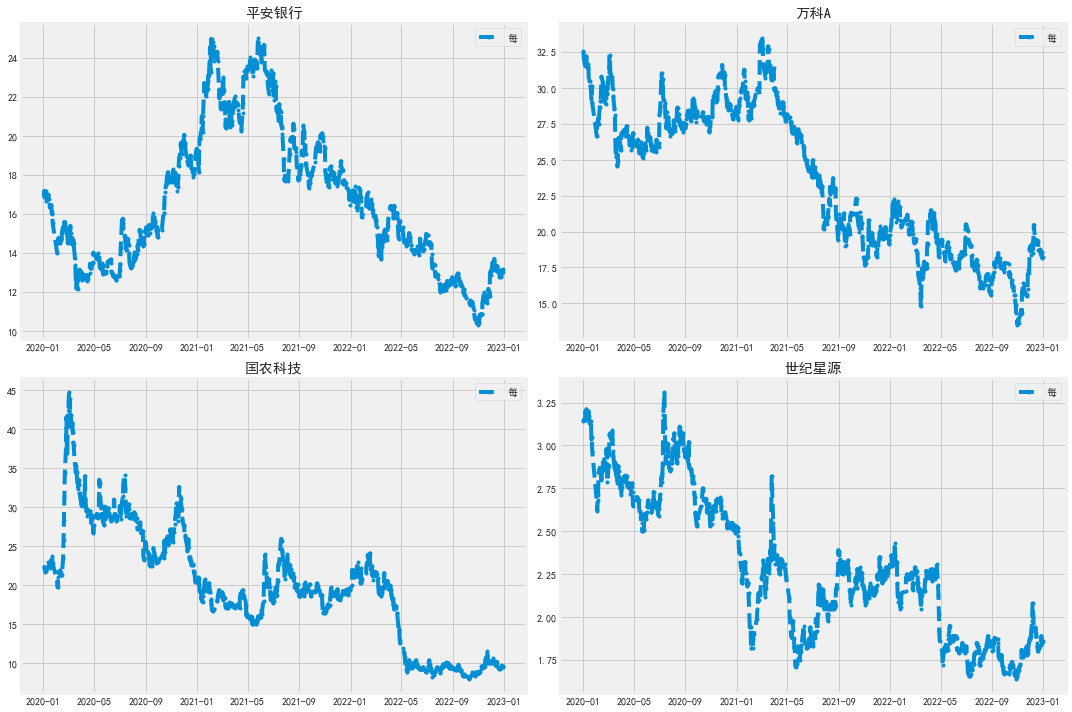

In [6]:
for company in company_list:
    company['Daily Return'] = company['close'].pct_change()
    #当前元素与先前元素的相差百分比，当然指定periods=n,表示当前元素与先前n 个元素的相差百分比。
# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1)
#     company['close'].plot()
    plt.plot(company['trade_date'], company['close'],linestyle='--', marker='o',markersize=3)
    plt.legend('每日收益')
    plt.xlabel(None)
    plt.title(tech_list[i])
    
plt.tight_layout()#自动调整子图参数，使之填充整个图像区域

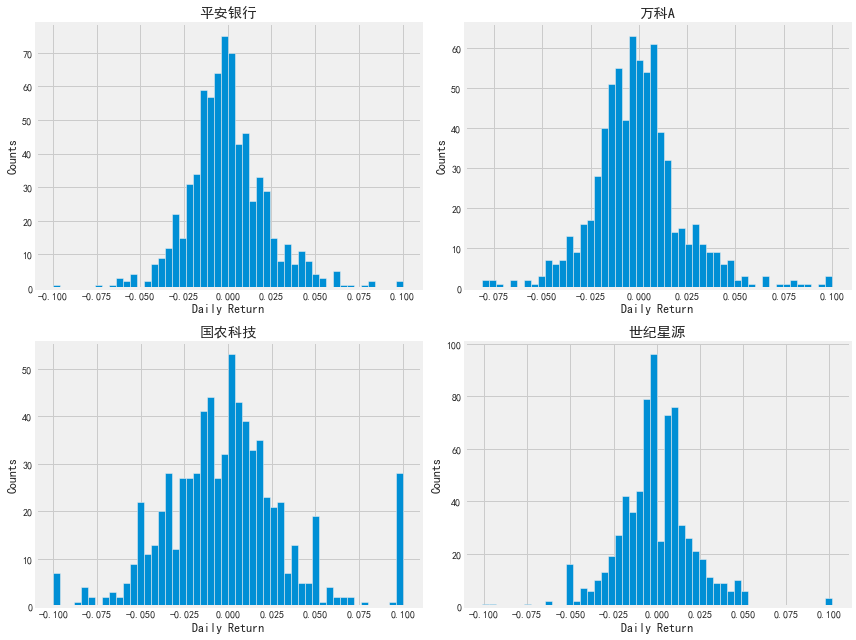

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(tech_list[i])
    
plt.tight_layout()

In [4]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df=pd.concat([data1['close'],data2['close'],data3['close'],data4['close']],axis=1)
closing_df.columns=tech_list
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,平安银行,万科A,国农科技,世纪星源
trade_date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,0.018376,-0.015663,0.000896,0.003185
2020-01-06,-0.006403,-0.016849,-0.026846,0.000000
2020-01-07,0.004687,0.007934,0.016092,0.015873
2020-01-08,-0.028571,-0.002519,-0.014480,-0.015625


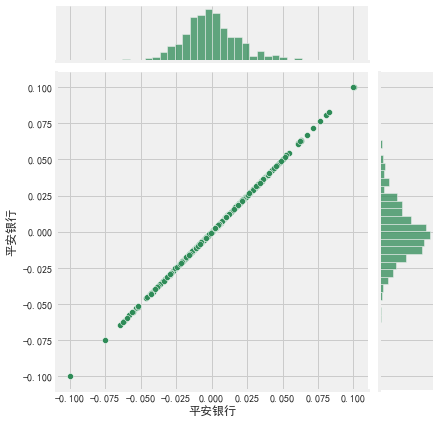

In [10]:
# Comparing 平安银行to itself should show a perfectly linear relationship
sns.jointplot(x='平安银行', y='平安银行', data=tech_rets, kind='scatter', color='seagreen')

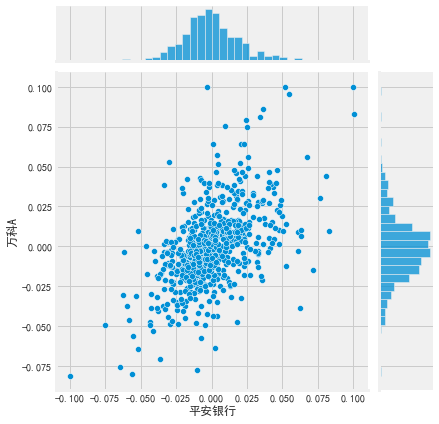

In [12]:
# Comparing 平安银行 to 万科A should show a perfectly linear relationship
sns.jointplot(x='平安银行', y='万科A', data=tech_rets, kind='scatter')

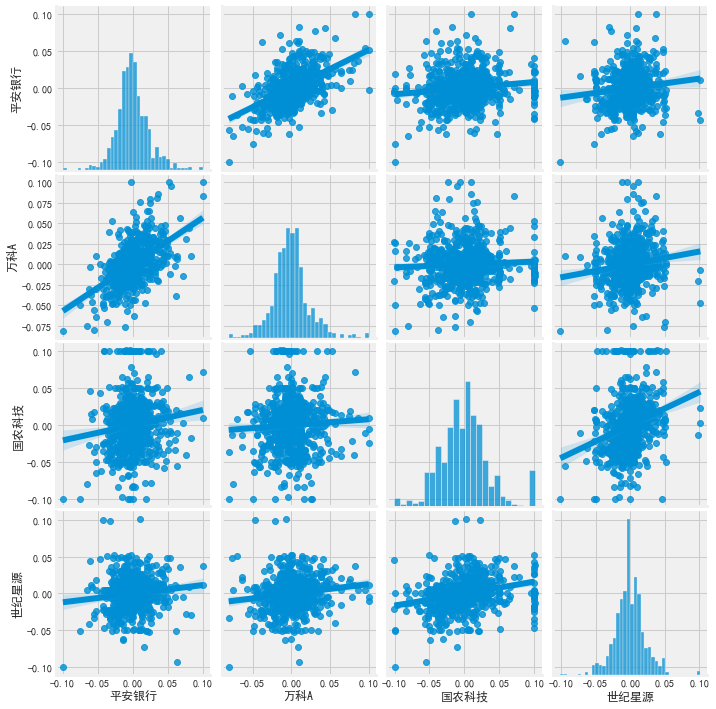

In [13]:
sns.pairplot(tech_rets, kind='reg')

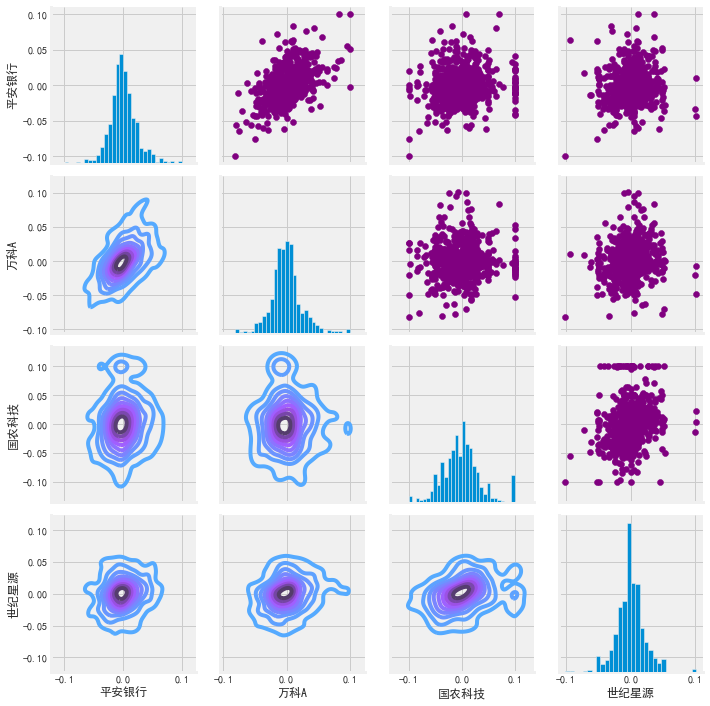

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

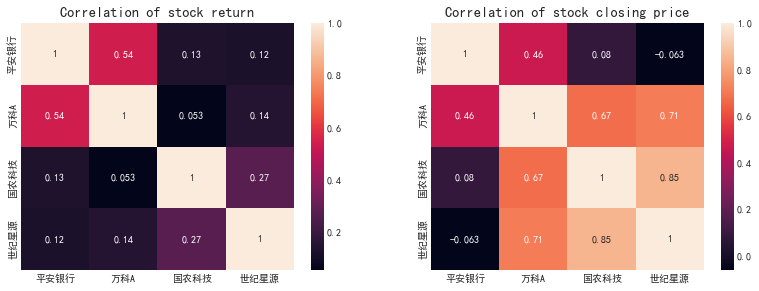

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True)
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True)
plt.title('Correlation of stock closing price')

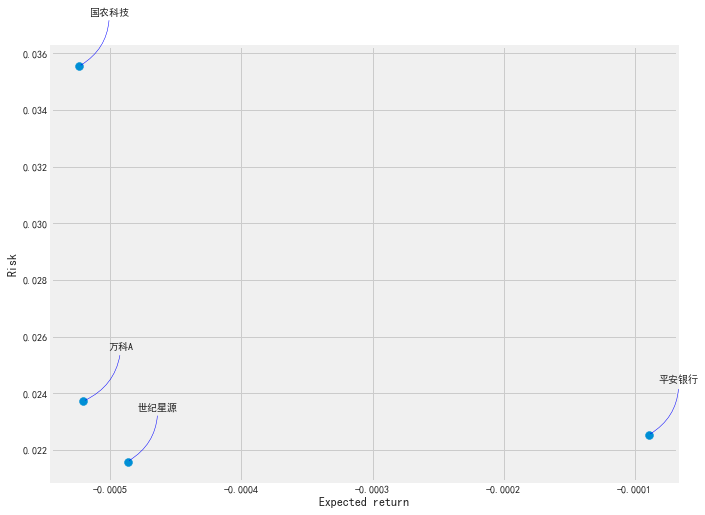

In [5]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

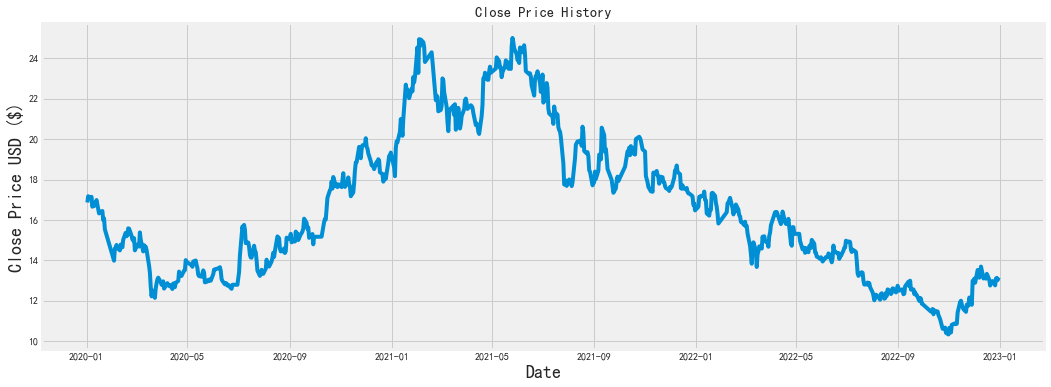

In [9]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data1['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [10]:
# Create a new dataframe with only the 'Close column 
data = data1.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

692

In [14]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.44512611],
       [0.46625767],
       [0.45875937],
       [0.46421268],
       [0.43081118],
       [0.4396728 ],
       [0.43285617],
       [0.45330607],
       [0.43762781],
       [0.42126789],
       [0.40831629],
       [0.41240627],
       [0.41649625],
       [0.3858214 ],
       [0.39195637],
       [0.35446489],
       [0.24880709],
       [0.29038855],
       [0.29243354],
       [0.30197682],
       [0.29175187],
       [0.28357192],
       [0.30334015],
       [0.30197682],
       [0.29379686],
       [0.31970007],
       [0.34287662],
       [0.33128834],
       [0.334015  ],
       [0.35787321],
       [0.35719155],
       [0.33333333],
       [0.32038173],
       [0.31697342],
       [0.32515337],
       [0.28357192],
       [0.30334015],
       [0.29856851],
       [0.29652352],
       [0.34423995],
       [0.31970007],
       [0.2801636 ],
       [0.30129516],
       [0.29652352],
       [0.29584185],
       [0.28493524],
       [0.23244717],
       [0.209

In [15]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.44512611, 0.46625767, 0.45875937, 0.46421268, 0.43081118,
       0.4396728 , 0.43285617, 0.45330607, 0.43762781, 0.42126789,
       0.40831629, 0.41240627, 0.41649625, 0.3858214 , 0.39195637,
       0.35446489, 0.24880709, 0.29038855, 0.29243354, 0.30197682,
       0.29175187, 0.28357192, 0.30334015, 0.30197682, 0.29379686,
       0.31970007, 0.34287662, 0.33128834, 0.334015  , 0.35787321,
       0.35719155, 0.33333333, 0.32038173, 0.31697342, 0.32515337,
       0.28357192, 0.30334015, 0.29856851, 0.29652352, 0.34423995,
       0.31970007, 0.2801636 , 0.30129516, 0.29652352, 0.29584185,
       0.28493524, 0.23244717, 0.20927062, 0.16155419, 0.12883436,
       0.14860259, 0.12338105, 0.15473756, 0.1724608 , 0.18541241,
       0.19154738, 0.17723245, 0.16768916, 0.17382413, 0.17927744])]
[0.15473755964553504]

[array([0.44512611, 0.46625767, 0.45875937, 0.46421268, 0.43081118,
       0.4396728 , 0.43285617, 0.45330607, 0.43762781, 0.42126789,
       0.40831629, 0.41240627, 0.41

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

632/632 [==============================] - 21s 27ms/step - loss: 0.0049


In [18]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.6225604862477274

C:\Users\asus\AppData\Local\Temp/ipykernel_9032/2269485014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


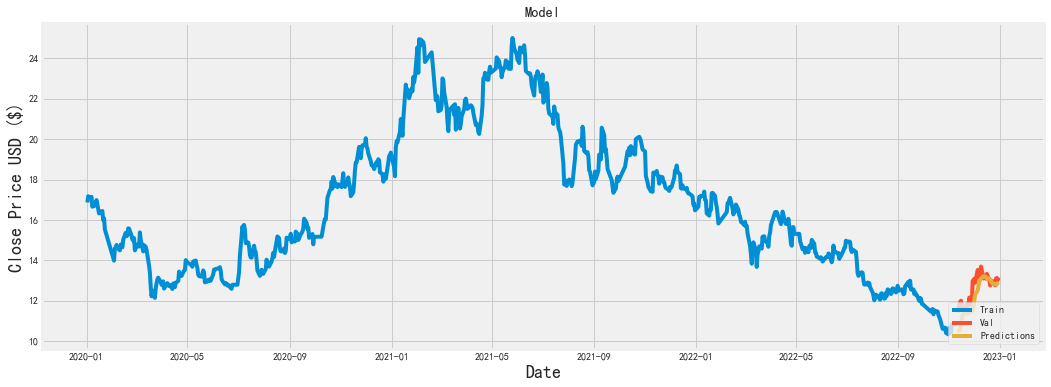

In [20]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
# Show the valid and predicted prices
valid

,close,Predictions
trade_date,,
2022-11-11,11.43,10.464573
2022-11-14,11.95,10.585889
2022-11-15,12.01,10.814668
2022-11-16,11.82,11.072209
2022-11-17,11.69,11.269318
2022-11-18,11.59,11.380125
2022-11-21,11.46,11.411439
2022-11-22,11.82,11.375307
2022-11-23,11.82,11.372527


# 项目三

In [1]:
import tensorflow as tf
# tf.disable_v2_behavior()

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)


13582336/13568290 [==============================] - 3s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [5]:
import tensorflow as tf
TRAIN_SPLIT = 300000
tf.random.set_seed(13)

In [6]:
uni_data = df['T (degC)']
uni_data.index = df['Date Time']
uni_data.head()

Date Time
01.01.2009 00:10:00   -8.02
01.01.2009 00:20:00   -8.41
01.01.2009 00:30:00   -8.51
01.01.2009 00:40:00   -8.31
01.01.2009 00:50:00   -8.27
Name: T (degC), dtype: float64

array([<AxesSubplot:xlabel='Date Time'>], dtype=object)

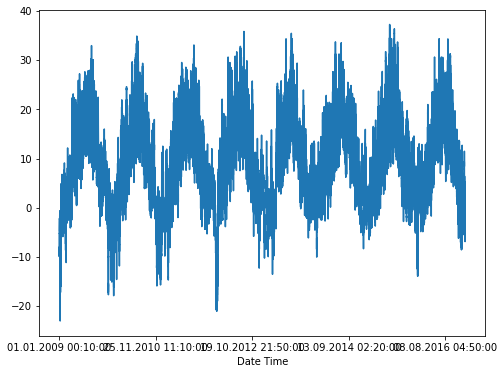

In [7]:
uni_data.plot(subplots=True)

In [8]:
uni_data = uni_data.values
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

uni_data = (uni_data-uni_train_mean)/uni_train_std


In [9]:
def create_time_steps(length):
    return list(range(-length, 0))

def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0]) # 横轴刻度
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
                     label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt


In [11]:
def baseline(history):
    return np.mean(history)

# show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
#            'Baseline Prediction Example')


In [12]:
features_considered = ['p (mbar)', 'T (degC)', 'rho (g/m**3)']

In [13]:
features = df[features_considered]
features.index = df['Date Time']
features.head()

,p (mbar),T (degC),rho (g/m**3)
Date Time,,,
01.01.2009 00:10:00,996.52,-8.02,1307.75
01.01.2009 00:20:00,996.57,-8.41,1309.80
01.01.2009 00:30:00,996.53,-8.51,1310.24
01.01.2009 00:40:00,996.51,-8.31,1309.19
01.01.2009 00:50:00,996.51,-8.27,1309.00


array([<AxesSubplot:xlabel='Date Time'>, <AxesSubplot:xlabel='Date Time'>,
       <AxesSubplot:xlabel='Date Time'>], dtype=object)

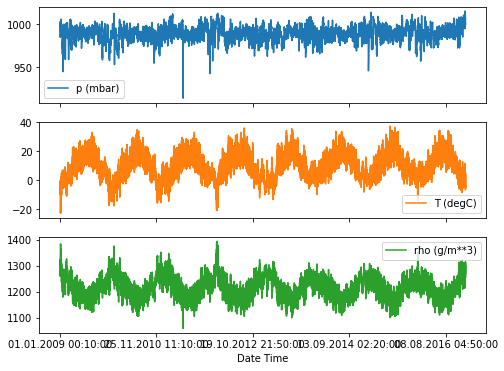

In [14]:
features.plot(subplots=True)


In [15]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

dataset = (dataset-data_mean)/data_std


In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step) # step表示间隔采样步长，6表示每个小时只使用一个采样值（原数据集每10分钟采集一次）
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)


In [ ]:
past_history = 720
future_target = 72
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)


In [ ]:
BATCH_SIZE = 32
BUFFER_SIZE = 10000
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [4]:
EVALUATION_INTERVAL = 200
EPOCHS = 10
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
#x_train_single.shape[-2:]，【120，3】120个时刻，3个特征
# single_step_model.add(tf.keras.layers.LSTM(32,
#                                             input_shape=[120,3]))
single_step_model.add(tf.keras.layers.Dense(72))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)


In [5]:
single_step_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4608      
                                                                 
 dense_1 (Dense)             (None, 72)                2376      
                                                                 
Total params: 6,984
Trainable params: 6,984
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EVALUATION_INTERVAL = 200
EPOCHS = 10
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)


In [ ]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()


In [1]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

# single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
#                                             steps_per_epoch=EVALUATION_INTERVAL,
#                                             validation_data=val_data_single,
#                                             validation_steps=50)


NameError: name 'tf' is not defined